#Previsione retention impiegati

#Estrazione informazioni dal dataset

Elenco delle features

1.   Education : The highest level of formal education obtained by the employee
2.   JoiningYear : Year of joining the company
3.   City : Job Location
4.   PaymentTier : [1:3] -> 1 means better payment
5.   Age : Age of the employee
6.   Gender : Gender of the employee
7.   EverBenched : Ever kept out of project for more than one month
8.   ExperienceInCurrentDomain : Experience in current field

Classificazione
9.   LeaveOrNot : Whether the employee leaves the company in next 2 years

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/sample_data/Employee.csv')
df_targets = pd.DataFrame(df, columns=['LeaveOrNot'])
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Sintesi dei dati ed elenco valori delle classi target

In [85]:
print(df.describe().T)
print('\nValori unici delle classi target')
print(df_targets['LeaveOrNot'].unique())

                            count         mean       std     min     25%  \
JoiningYear                4653.0  2015.062970  1.863377  2012.0  2013.0   
PaymentTier                4653.0     2.698259  0.561435     1.0     3.0   
Age                        4653.0    29.393295  4.826087    22.0    26.0   
ExperienceInCurrentDomain  4653.0     2.905652  1.558240     0.0     2.0   
LeaveOrNot                 4653.0     0.343864  0.475047     0.0     0.0   

                              50%     75%     max  
JoiningYear                2015.0  2017.0  2018.0  
PaymentTier                   3.0     3.0     3.0  
Age                          28.0    32.0    41.0  
ExperienceInCurrentDomain     3.0     4.0     7.0  
LeaveOrNot                    0.0     1.0     1.0  

Valori unici delle classi target
[0 1]


## Fase di pre processing

### Gestione valori null

Il data set non ha valori null

In [6]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

> ### Trasformazione dati

Cambio il tipo da stringa a numerico e inverto la classificazione dello stipendio

In [37]:

print(df['Education'].unique())
print(df['Gender'].unique())
print(df['EverBenched'].unique())
print(df['City'].unique())
dfv = df.copy()
dfv['PaymentTier'].replace([1,2,3], [3,2,1],inplace=True)
dfv['Education'].replace(['Bachelors', 'Masters', 'PHD'],[1,2,3],inplace=True)
dfv['Gender'].replace(['Male', 'Female'],[0, 1],inplace=True)
dfv['EverBenched'].replace(['No', 'Yes'], [0, 1],inplace=True)
dfv['City'].replace(['Bangalore','New Delhi', 'Pune'], [1, 2, 3],inplace=True)
print(df.head())
dfv.head()
print(dfv.describe().T)

['Bachelors' 'Masters' 'PHD']
['Male' 'Female']
['No' 'Yes']
['Bangalore' 'Pune' 'New Delhi']
   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  
                            count         mean       std     min     25%  \
Education                  4653.0     1.264560  0.521120     1.0     1.0   
JoiningYear                

# Visualizzazione ed analisi dei dati

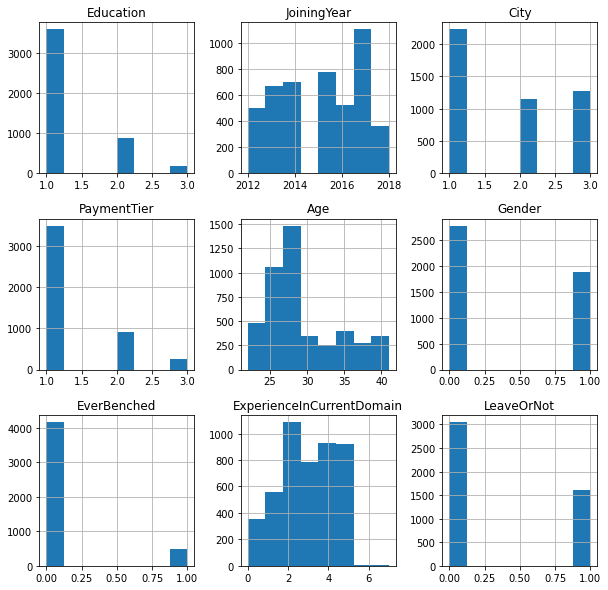

In [35]:
dfv.hist(bins=8, figsize=(10, 10))
plt.show()

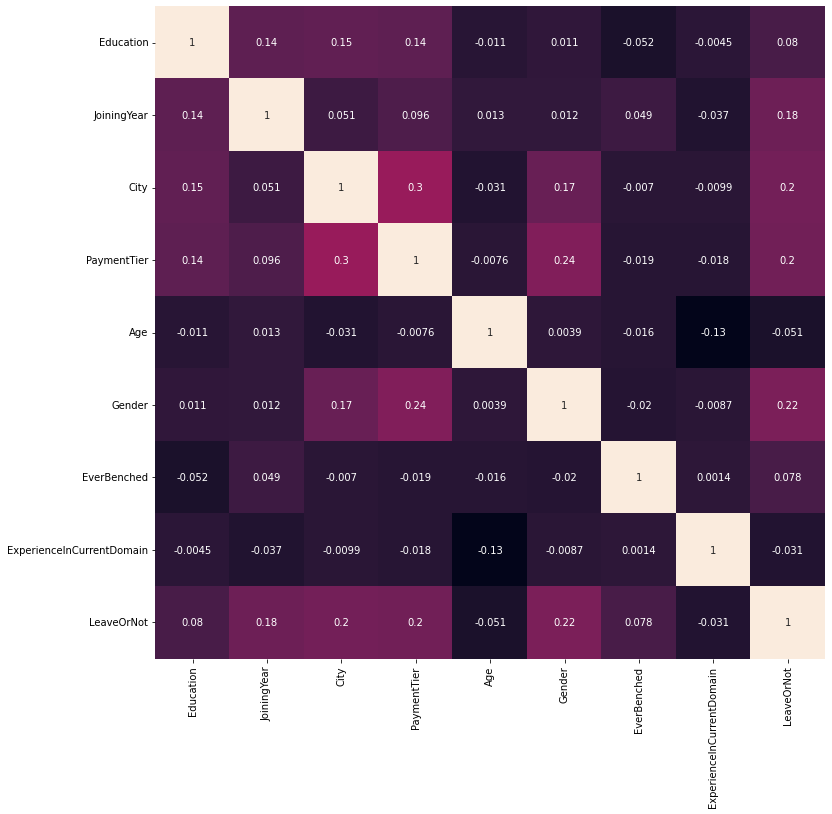

In [36]:
plt.figure(figsize=(12, 12))
sns.heatmap(dfv.corr(), annot=True, cbar=False)
plt.show()

# Sviluppo modello random forest

##Preparazione data set training e test

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="ticks")

xtrain, xtest, ytrain, ytest = train_test_split(dfv.iloc[:,:-1].values, df_targets.values, test_size=0.3, random_state=1)
#xtrain.shape, xtest.shape, xtrain.describe().T, xtest.describe().T

##Normalizzazione dati

In [67]:
norm = MinMaxScaler()

print(xtrain.iloc[0])
xtrain_norm = norm.fit_transform(xtrain)
print('\nxtrain_norm[0]')
print(xtrain_norm[0])

#print(xtest.iloc[0])
xtest_norm = norm.transform(xtest)
print('\nxtest_norm[0]')
print(xtest_norm[0])

Education                       1
JoiningYear                  2017
City                            1
PaymentTier                     1
Age                            25
Gender                          1
EverBenched                     0
ExperienceInCurrentDomain       3
LeaveOrNot                      0
Name: 83, dtype: int64

xtrain_norm[0]
[0.         0.83333333 0.         0.         0.15789474 1.
 0.         0.42857143 0.        ]

xtest_norm[0]
[0.         0.83333333 0.5        0.5        0.21052632 0.
 0.         0.57142857 0.        ]


##Training del modello

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model_rfc=RandomForestClassifier(n_jobs=-1)
parameters = {'n_estimators':[50,100,200,300,400],'max_depth':[3,4,5,6]}
model_rfc_grid = GridSearchCV(model_rfc, parameters,cv=10,verbose=1,n_jobs=-1).fit(xtrain,ytrain)
print(model_rfc_grid.best_params_)

print('Random Forest Classifier Cros validation score:',model_rfc_grid.best_score_*100)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'max_depth': 6, 'n_estimators': 100}
Random Forest Classifier Cros validation score: 83.94270882491742


# Valutazione modello

## Confusion matrix

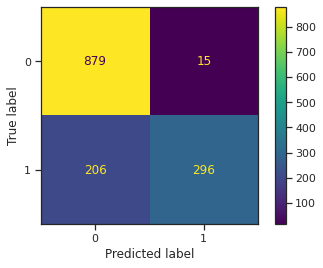

In [78]:
from sklearn import metrics
metrics.plot_confusion_matrix(model_rfc_grid, xtest, ytest)
plt.show()

## Risultati accuratezza

In [83]:
print(f'{model_rfc_grid} : ')
print('\nTraining Accuracy : ', metrics.f1_score(ytrain, model_rfc_grid.predict(xtrain), average='macro'))
print('\nValidation Accuracy : ', metrics.f1_score(ytest, model_rfc_grid.predict(xtest), average='macro'))
print('\n ** metrics.classification_report ** \n')
print(metrics.classification_report(ytest, model_rfc_grid.predict(xtest)))

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 200, 300, 400]},
             verbose=1) : 

Training Accuracy :  0.8072445808218393

Validation Accuracy :  0.8082473598864337

 ** metrics.classification_report ** 

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       894
           1       0.95      0.59      0.73       502

    accuracy                           0.84      1396
   macro avg       0.88      0.79      0.81      1396
weighted avg       0.86      0.84      0.83      1396

